# **The primary objective of this project is to build and evaluate machine learning models for predicting the presence of heart disease based on a given set of features such as age, sex, blood pressure, cholesterol levels, and other relevant medical data. The goal is to achieve high accuracy while prioritizing sensitivity (recall) to minimize the risk of misdiagnosing individuals with heart disease.**

### **Cardiovascular diseases (CVDs) are a leading cause of death globally, and early detection plays a crucial role in improving patient outcomes. Machine learning techniques can be leveraged to analyze various medical parameters and predict the presence or absence of heart disease with high accuracy. This project aims to develop a predictive model that can assist healthcare professionals in identifying individuals at risk of heart disease.**

## **Dataset:**
**The project will utilize the Heart Disease Dataset from the UCI Machine Learning Repository. This dataset contains 14 features and a binary target variable indicating the presence or absence of heart disease. The features include:**

1.	Age
2.	Sex
3.	Chest pain type (4 values)
4.	Resting blood pressure
5.	Serum cholesterol levels
6.	Fasting blood sugar (binary)
7.	Resting electrocardiographic results (3 values)
8.	Maximum heart rate achieved
9.	Exercise-induced angina (binary)
10.	ST depression induced by exercise relative to rest
11.	Slope of the peak exercise ST segment (3 values)
12.	Number of major vessels colored by fluoroscopy (0-4)
13.	Thalassemia (3 values)
14.	Target variable (0 for absence and 1 for presence of heart disease)

# **Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Loading the Dataset and Examining Its Structure**

**I'll load the dataset and display the first few rows to understand its structure.**

In [2]:
heart_data = pd.read_csv('heart_disease.csv', header=0)

In [3]:
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
print(heart_data.shape)

(1025, 14)


In [5]:
print(list(heart_data.columns))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
heart_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [7]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Data Type Conversion**
**Convert data types to float for consistency.**

In [9]:
# Convert data types to float
heart_data = heart_data.astype(float)

In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   float64
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   float64
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1025 non-null   float64
dtypes: float64(14)
memory usage: 112.2 KB


### **Checking for Missing Values**

**Next, we'll check for any missing values in the dataset.**

In [11]:
# Check for missing values
missing_values = heart_data.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Summary statistics
summary_stats = heart_data.describe()

### **Exploratory Data Analysis (EDA)**

**We'll perform some basic EDA to understand the distribution of features and their relationships with the target variable.**

In [13]:
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Target Variable')
plt.show()

# **Pairplot for selected features**

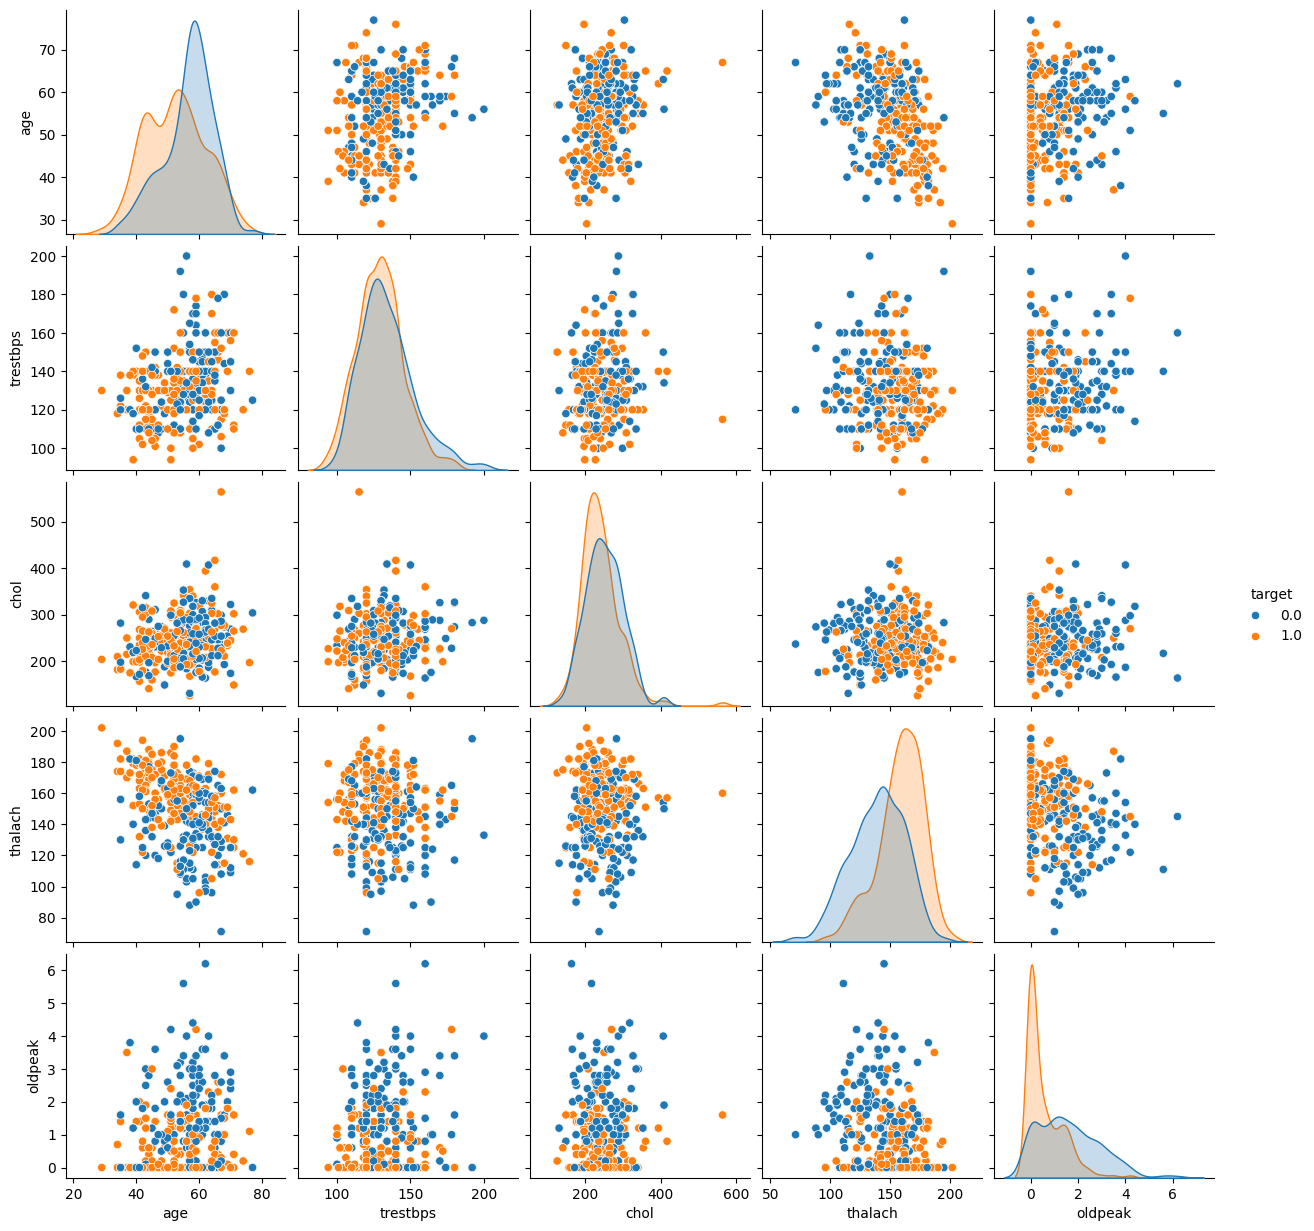

In [14]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(heart_data[selected_features], hue='target')
plt.show()

# **Plot the correlation heatmap**

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Plot histograms for numerical features**

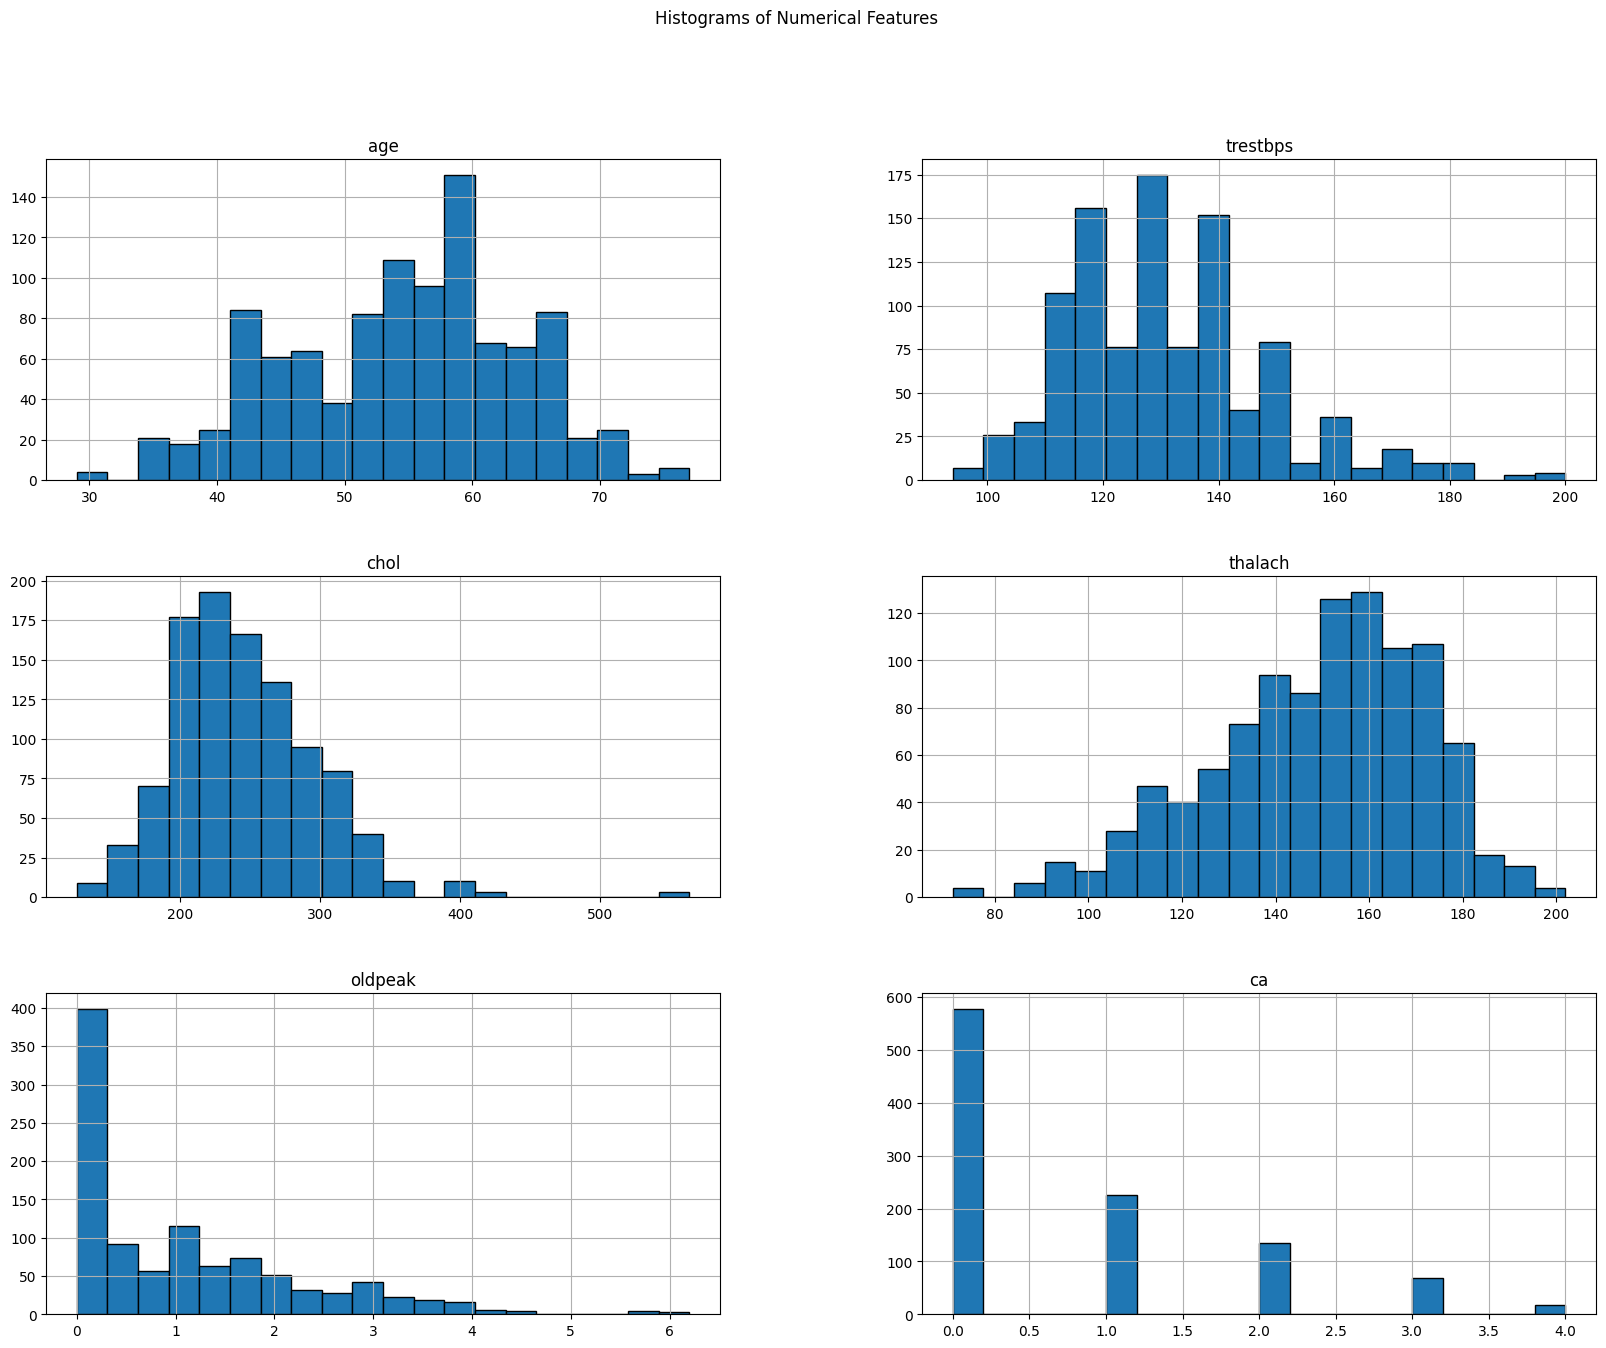

In [16]:
# Identify numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

heart_data[numerical_features].hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# **Plot boxplots for numerical features**

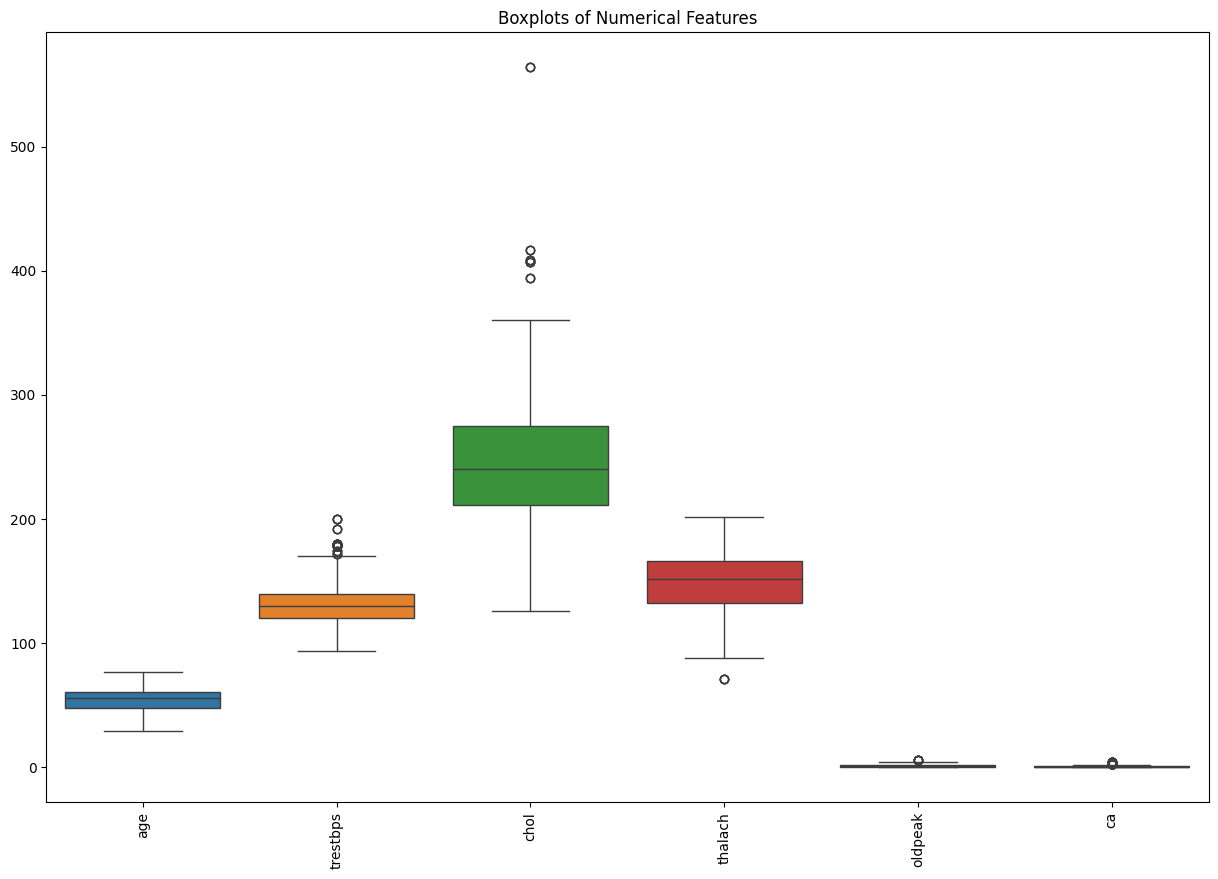

In [17]:
# Identify numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

plt.figure(figsize=(15, 10))
sns.boxplot(data=heart_data[numerical_features])
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Features')
plt.show()

# **Bar plots for categorical features**

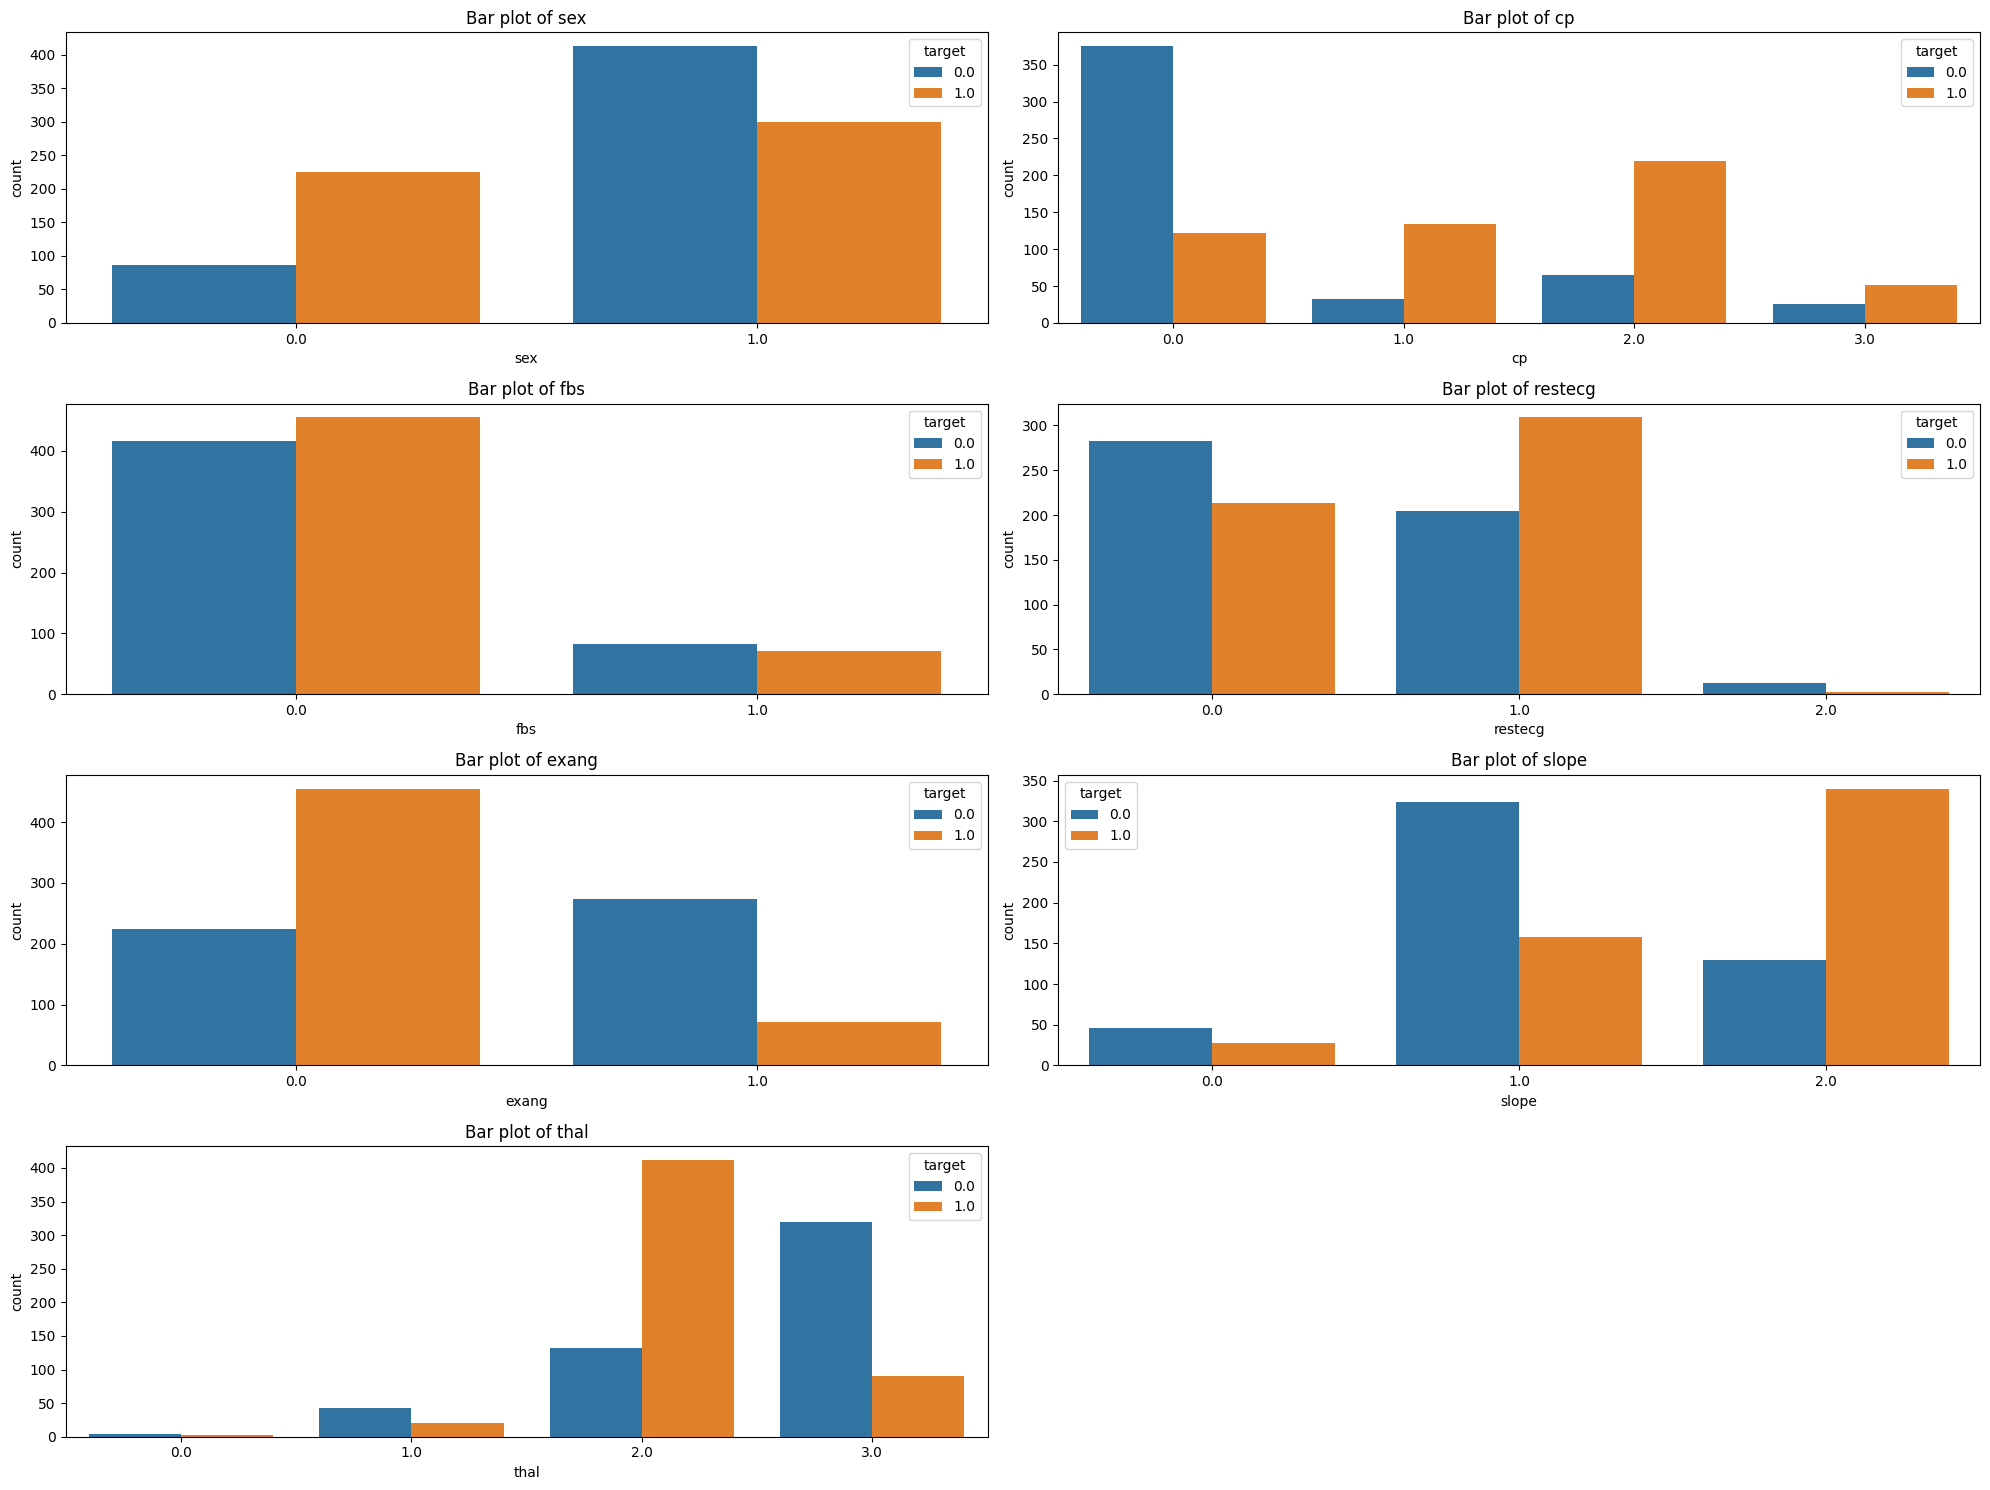

In [18]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Assuming 'target' is the name of the target variable column in your DataFrame
target = 'target' # Replace 'target' with the actual name of your target variable column if different

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=heart_data, x=feature, hue=target)
    plt.title(f'Bar plot of {feature}')

plt.tight_layout()
plt.show()

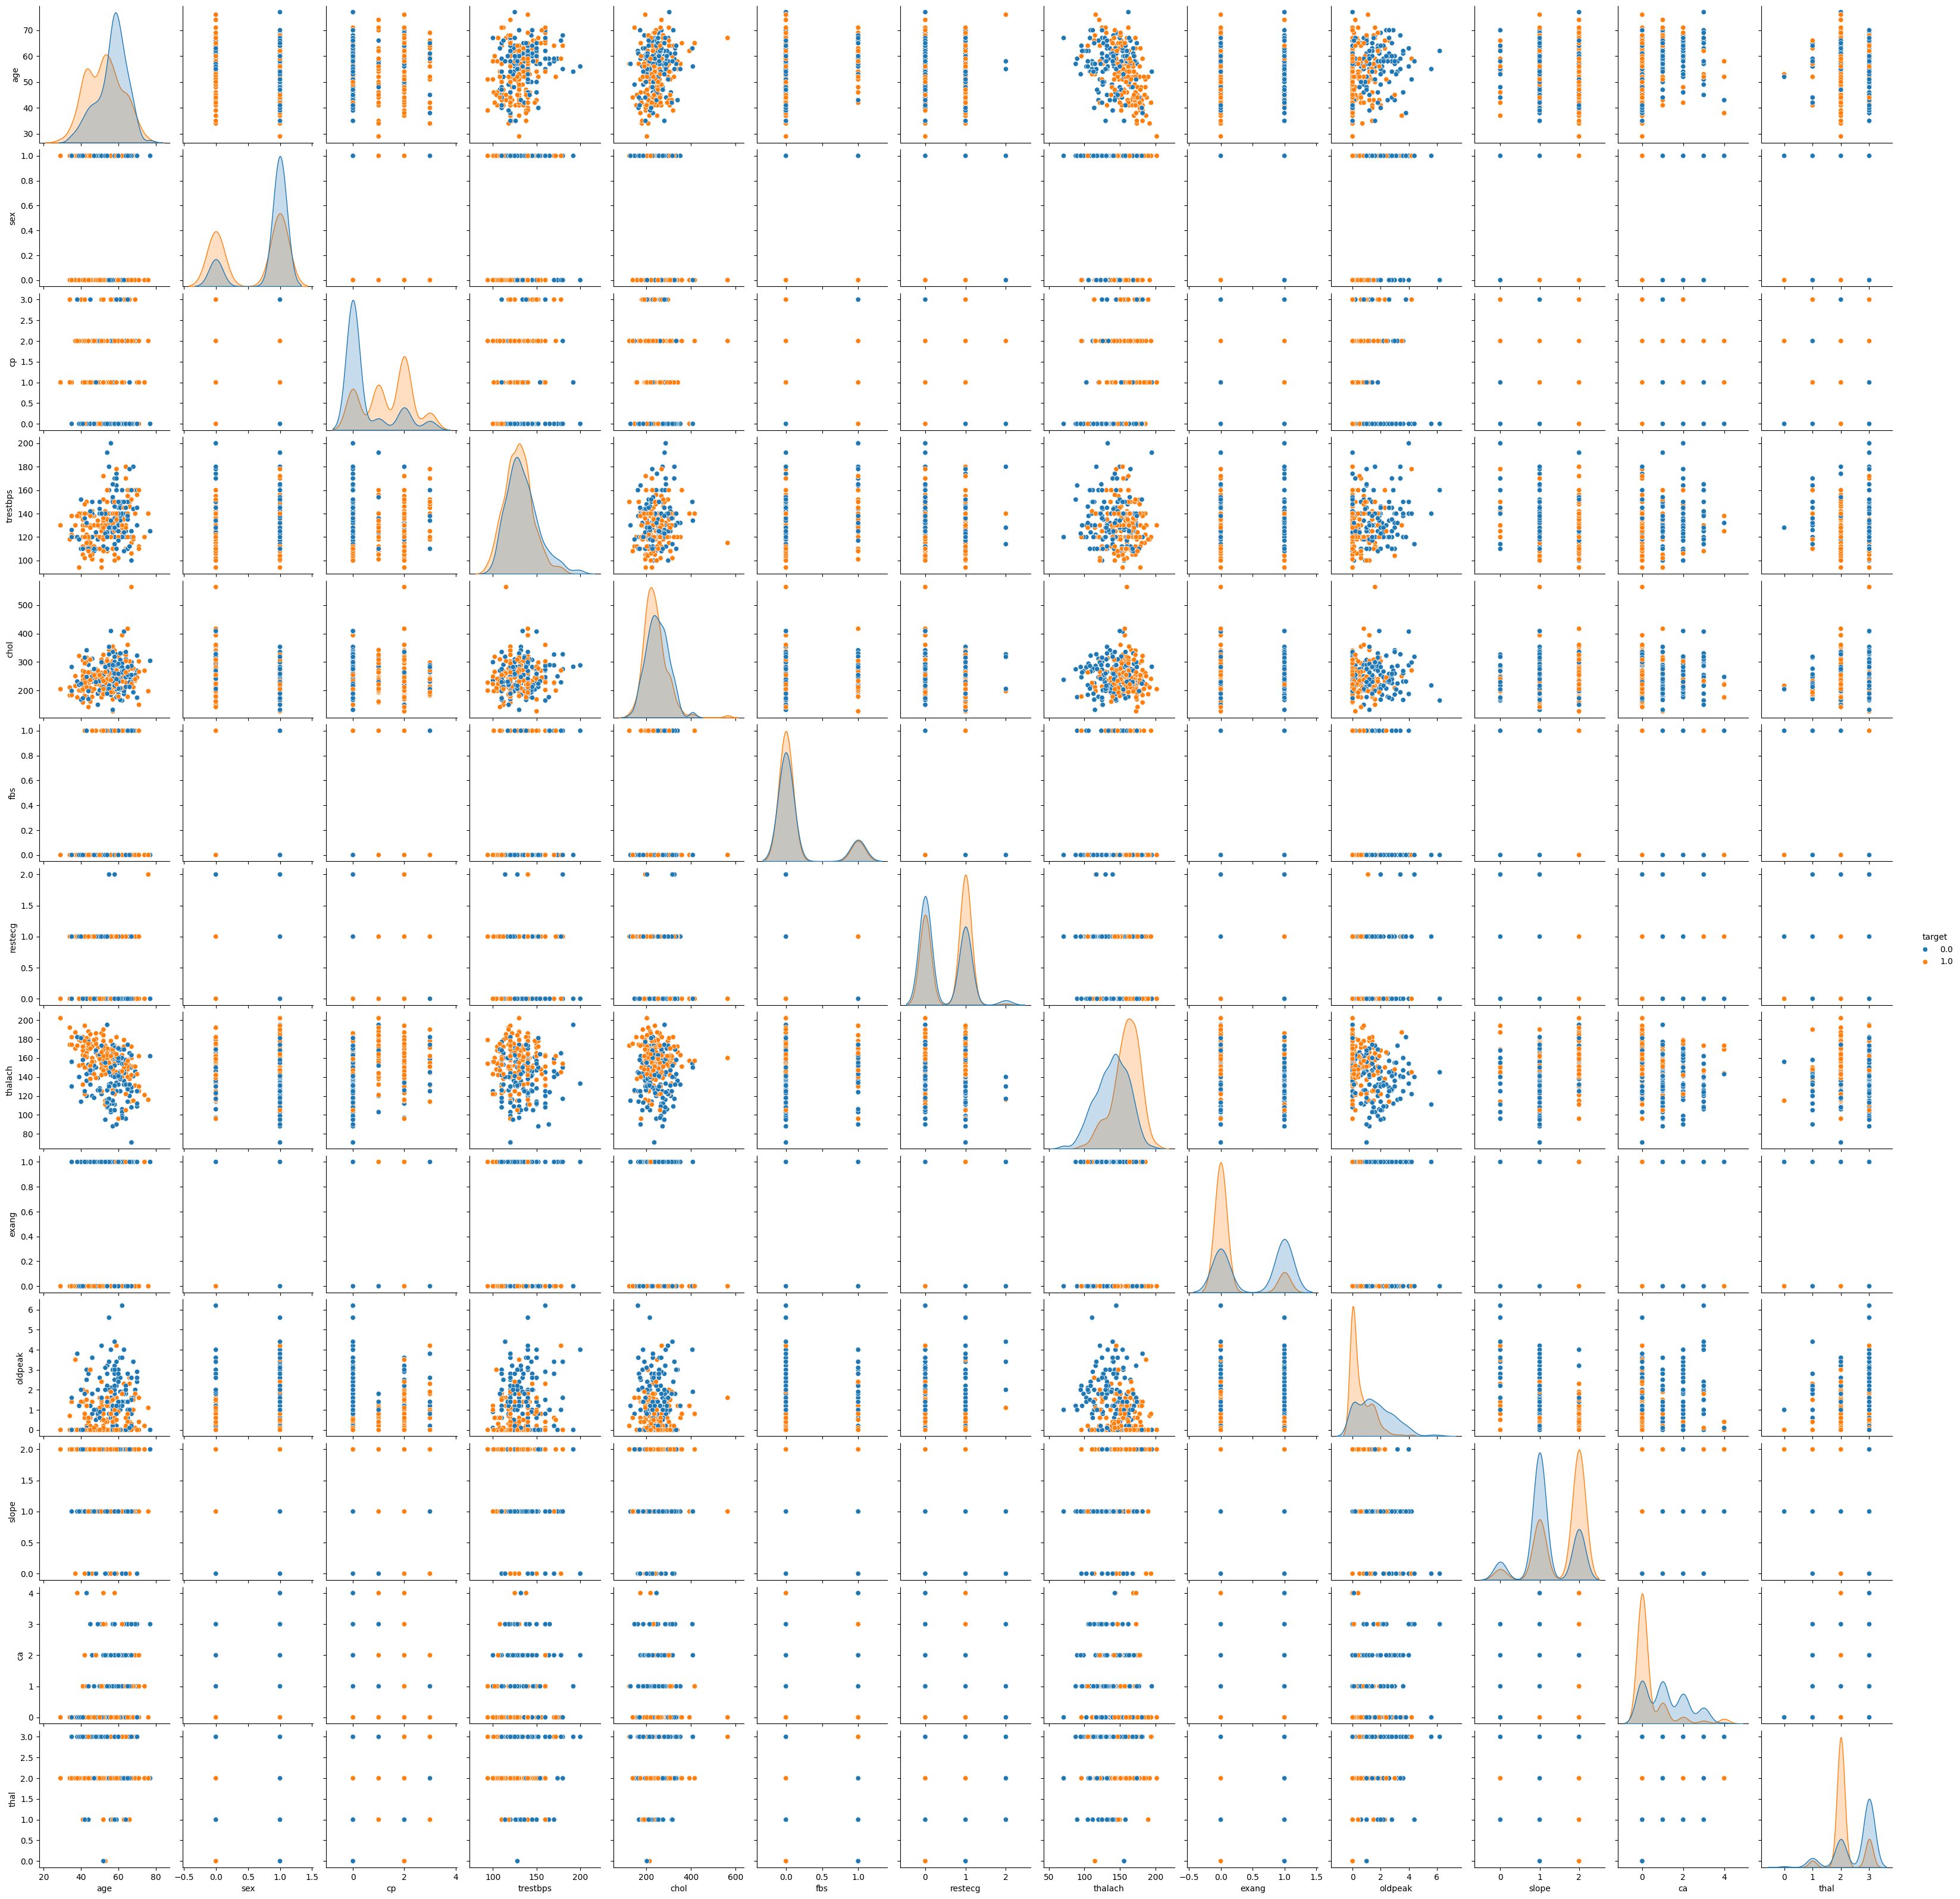

In [21]:
# Pairplot to observe relationships
sns.pairplot(heart_data, hue='target')
plt.show()


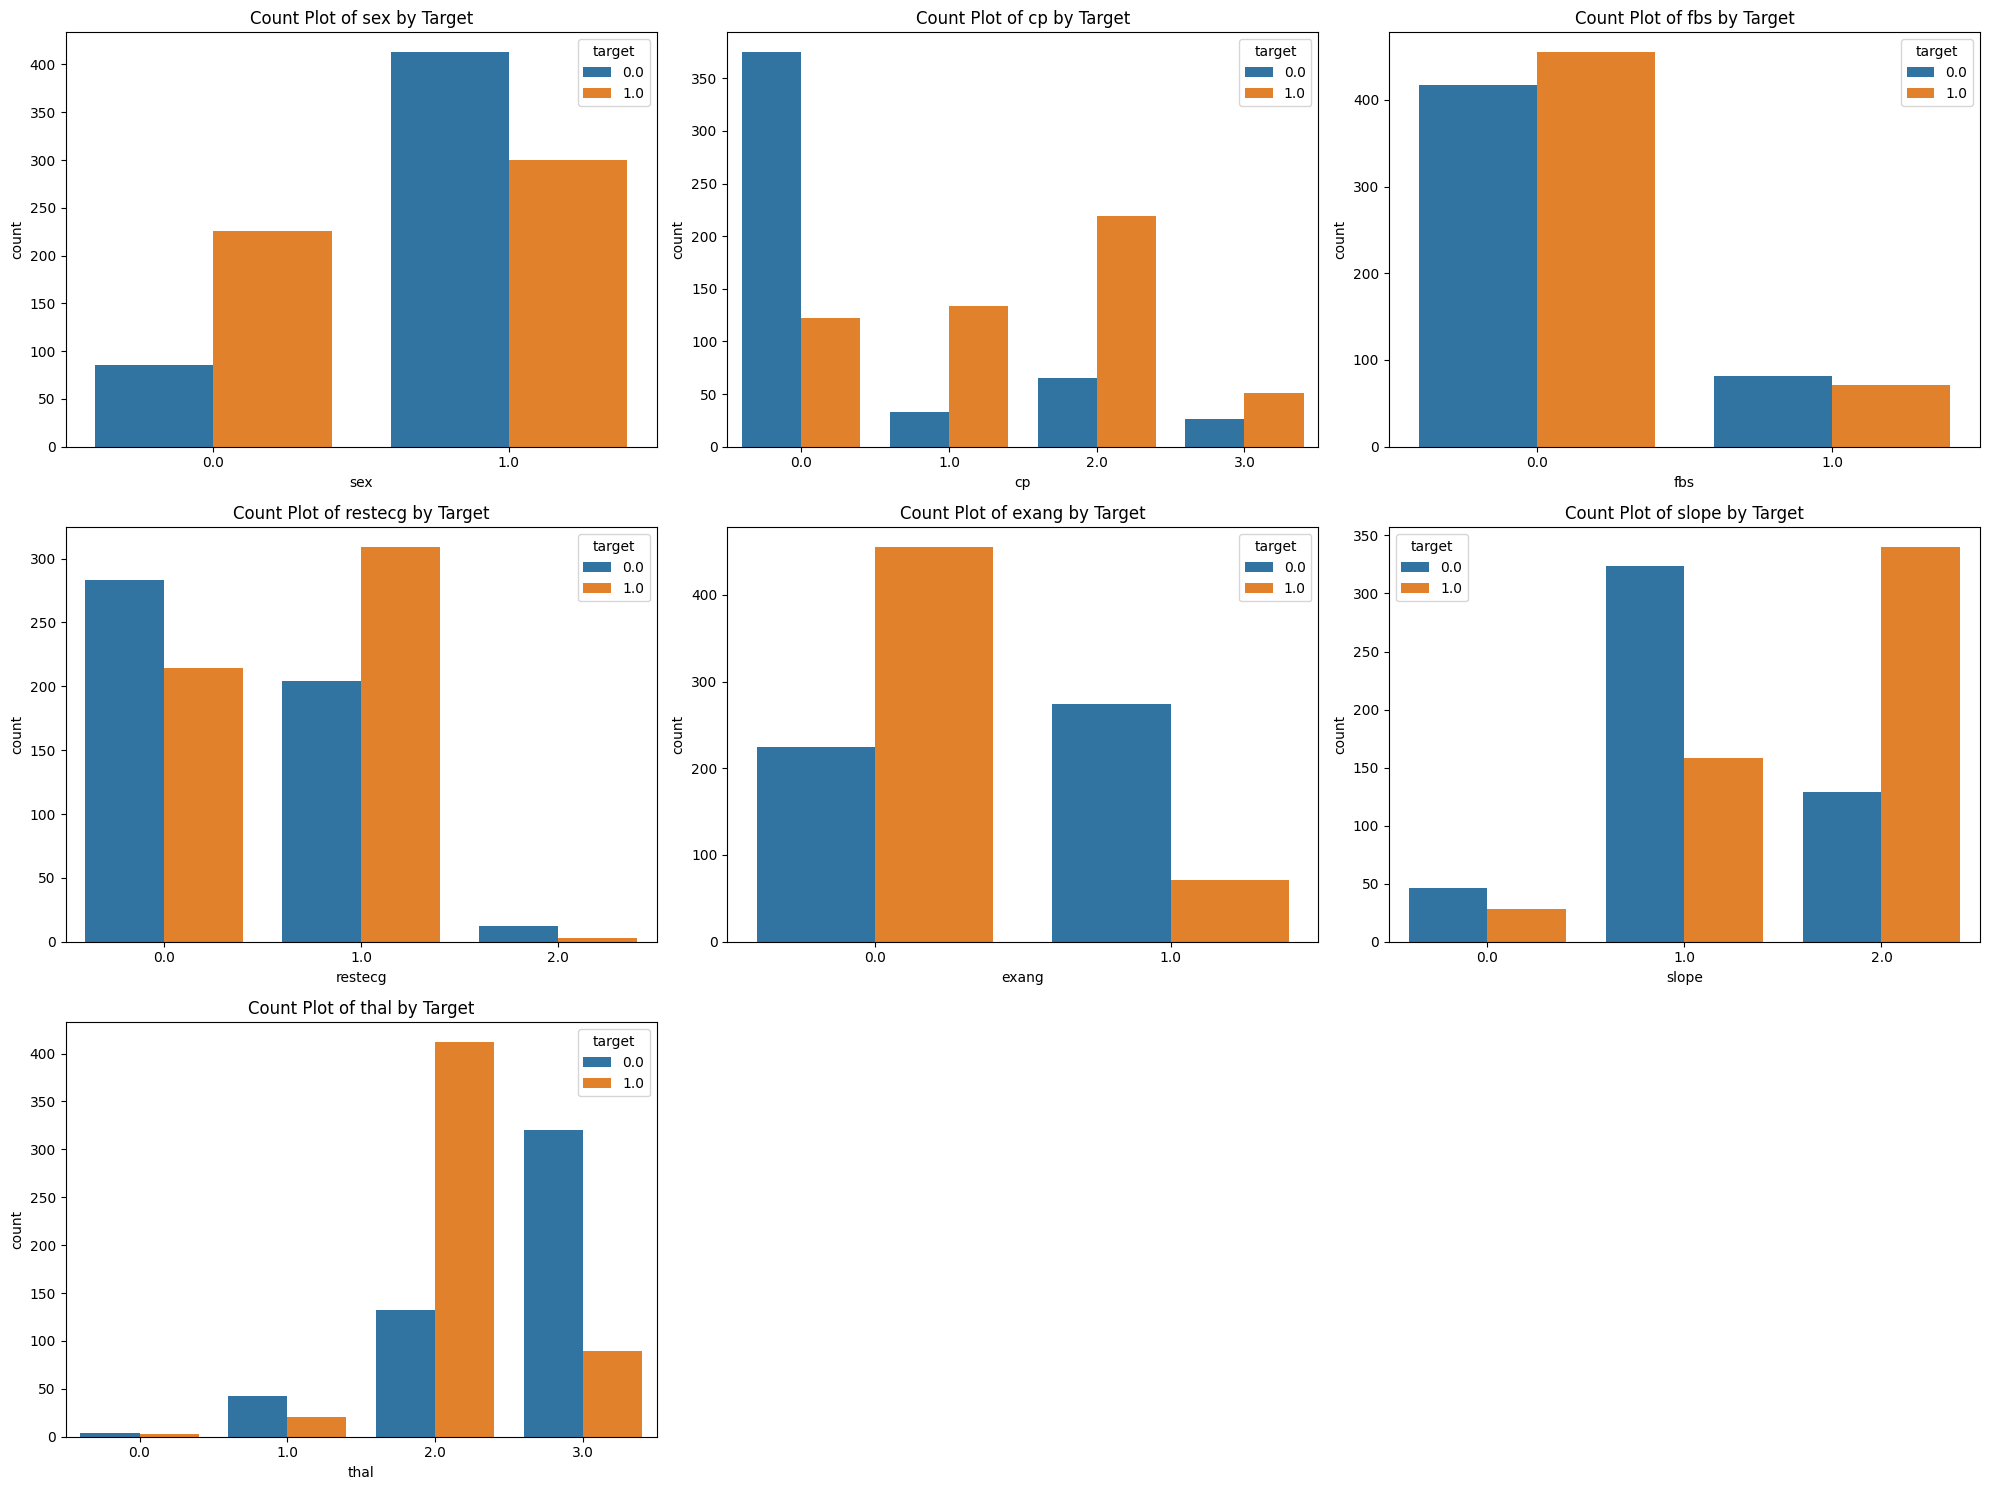

In [22]:
# Count plots to observe relationships with categorical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='target', data=heart_data)
    plt.title(f"Count Plot of {column} by Target")
plt.tight_layout()
plt.show()

  # **Handle Categorical Features**

  **Handle categorical features using techniques like one-hot encoding.**

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# **Split the Dataset**

**Split the dataset into training and testing sets, ensuring that the class distribution is maintained in both sets.**

In [24]:
from sklearn.model_selection import train_test_split

# Assuming your dataset is in a pandas DataFrame called 'heart_data'
X = heart_data.drop('target', axis=1)  # Replace 'heart_data' if your DataFrame has a different name
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Model Selection and Training**

**Choosing Algorithms**
**Choosing appropriate machine learning algorithms for classification tasks.**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# **Implement Algorithms**

**Implement the selected algorithms using Python libraries like scikit-learn, XGBoost, or LightGBM.**

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

param_grids = {
    "Logistic Regression": {'classifier__C': [0.1, 1, 10]},
    "Random Forest": {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]},
    "Gradient Boosting": {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 0.2]}
}

best_models = {}
for name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=StratifiedKFold(n_splits=5), scoring='recall')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'classifier__C': 10}
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 100}


# **Model Evaluation**

**Evaluate the performance of the trained models using appropriate metrics such as accuracy, precision, recall, and F1-score.**

Evaluation for Logistic Regression:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.89      0.83      0.86       100
   Heart Disease       0.85      0.90      0.88       105

        accuracy                           0.87       205
       macro avg       0.87      0.87      0.87       205
    weighted avg       0.87      0.87      0.87       205

Confusion Matrix:
[[83 17]
 [10 95]]


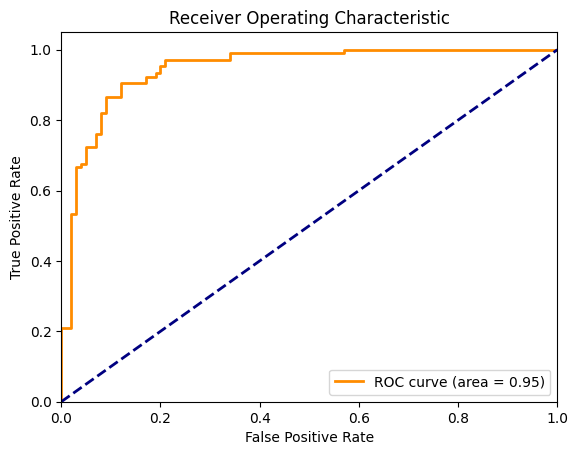

Evaluation for Random Forest:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00       105

        accuracy                           1.00       205
       macro avg       1.00      1.00      1.00       205
    weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
[[100   0]
 [  0 105]]


Evaluation for Gradient Boosting:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00       105

        accuracy                           1.00       205
       macro avg       1.00      1.00      1.00       205
    weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
[[100   0]
 [  0 105]]


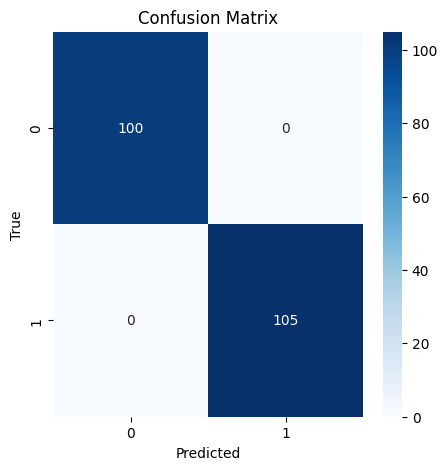

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plotting Confusion Matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate each model
for name, model in best_models.items():
    print(f"Evaluation for {name}:")
    evaluate_model(model, X_test, y_test)


# **Analysis of Model Performance**

**Analysis of Model Performance**

**Logistic Regression**

Logistic Regression Evaluation:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.89      0.83      0.86       100
   Heart Disease       0.85      0.90      0.88       105

        accuracy                           0.87       205
       macro avg       0.87      0.87      0.87       205
    weighted avg       0.87      0.87      0.87       205

Confusion Matrix:
[[83 17]
 [10 95]]


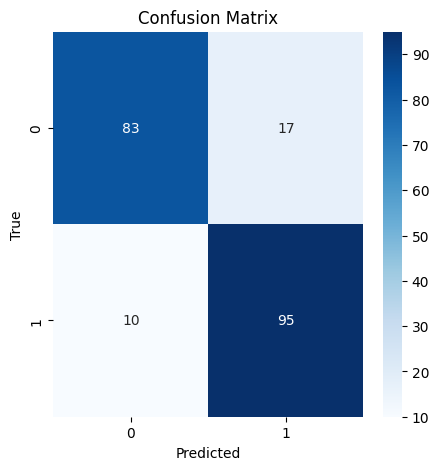

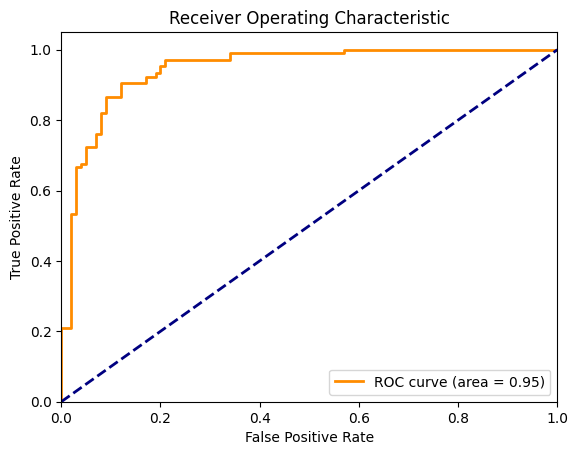

In [28]:
print("Logistic Regression Evaluation:")
evaluate_model(best_models["Logistic Regression"], X_test, y_test)


# **Random Forest**

Random Forest Evaluation:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00       105

        accuracy                           1.00       205
       macro avg       1.00      1.00      1.00       205
    weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
[[100   0]
 [  0 105]]


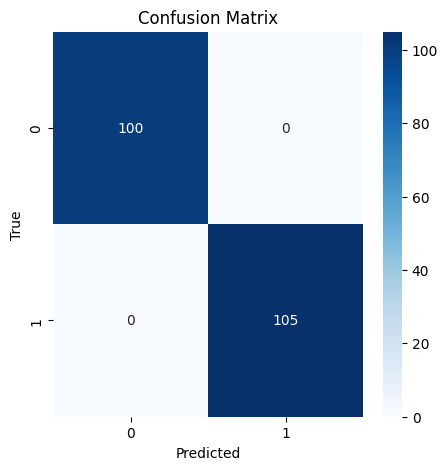

In [29]:
print("Random Forest Evaluation:")
evaluate_model(best_models["Random Forest"], X_test, y_test)

# **Gradient Boosting**

Gradient Boosting Evaluation:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00       105

        accuracy                           1.00       205
       macro avg       1.00      1.00      1.00       205
    weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
[[100   0]
 [  0 105]]


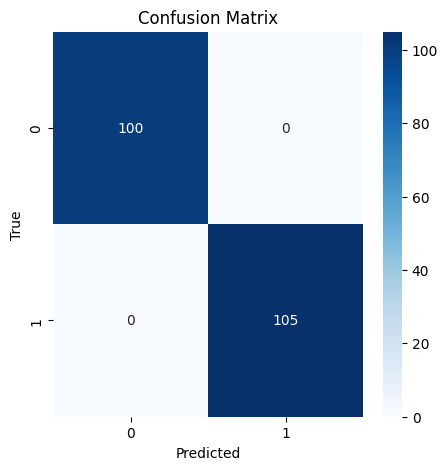

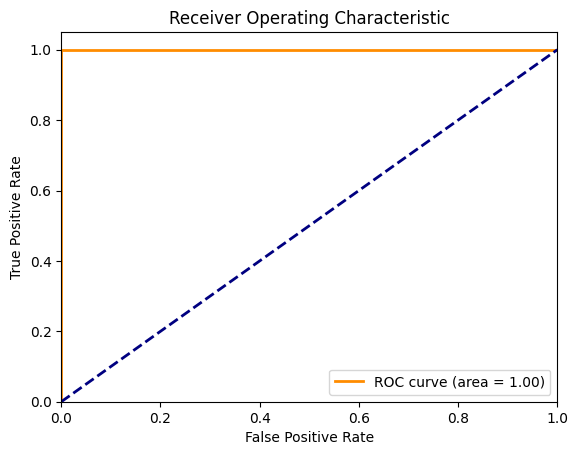

In [30]:
print("Gradient Boosting Evaluation:")
evaluate_model(best_models["Gradient Boosting"], X_test, y_test)

# **Applying Techniques to Reduce Overfitting**

**Regularization**

**For Logistic Regression, adding a regularization term can help reduce overfitting.**

In [31]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000, C=0.1, penalty='l2')
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

# **Pruning Decision Trees**

**For Decision Trees, we can set the 'max_depth' parameter to limit the depth of the tree.**

In [32]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

# **Ensemble Methods**

**Using Random Forest and Gradient Boosting, we can set parameters like 'n_estimators' and 'max_depth' to control the complexity.**

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest.fit(X_train, y_train)

gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# **Cross-Validation**

**Using cross-validation to ensure robust model evaluation and hyperparameter tuning.**

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# Logistic Regression with cross-validation
logistic_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='recall')
print("Logistic Regression Recall Scores: ", logistic_scores)
print("Mean Recall Score: ", logistic_scores.mean())

Logistic Regression Recall Scores:  [0.95238095 0.88095238 0.85714286 0.92857143 0.90588235]
Mean Recall Score:  0.9049859943977591


In [36]:
# Random Forest with cross-validation
rf_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='recall')
print("Random Forest Recall Scores: ", rf_scores)
print("Mean Recall Score: ", rf_scores.mean())

Random Forest Recall Scores:  [0.95238095 1.         1.         0.96428571 1.        ]
Mean Recall Score:  0.9833333333333334


In [37]:
# Gradient Boosting with cross-validation
gb_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='recall')
print("Gradient Boosting Recall Scores: ", gb_scores)
print("Mean Recall Score: ", gb_scores.mean())

Gradient Boosting Recall Scores:  [0.98809524 0.96428571 0.96428571 0.94047619 0.97647059]
Mean Recall Score:  0.9667226890756304


# **Feature Selection**

**Using techniques like Recursive Feature Elimination (RFE) to select the most important features.**

In [38]:
from sklearn.feature_selection import RFE

selector = RFE(logistic_regression, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print("Selected Features: ", selected_features)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Re-train the model with selected features
logistic_regression.fit(X_train_selected, y_train)

Selected Features:  Index(['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


LogisticRegression(C=0.1, max_iter=1000)

# **Reducing Model Complexity**

**Simplifying the model by reducing the number of parameters.**

In [39]:
# For Random Forest and Gradient Boosting, reducing the number of estimators and max depth
random_forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

gradient_boosting = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=2, random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=42)

# **Re-evaluating the Models**

**Re-evaluate the models after applying the techniques to reduce overfitting.**

In [49]:
# Re-evaluation function
def re_evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"]))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
     
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Random Forest Re-evaluation:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.97      0.89      0.93       100
   Heart Disease       0.90      0.97      0.94       105

        accuracy                           0.93       205
       macro avg       0.94      0.93      0.93       205
    weighted avg       0.93      0.93      0.93       205

Confusion Matrix:
[[ 89  11]
 [  3 102]]


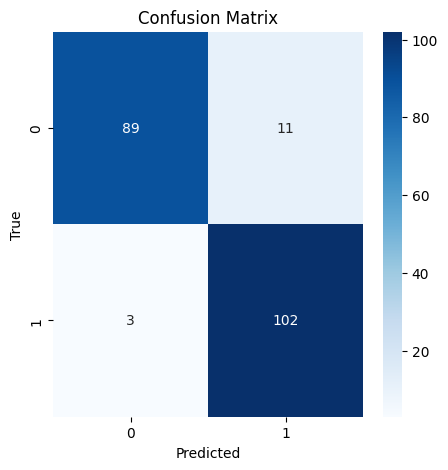

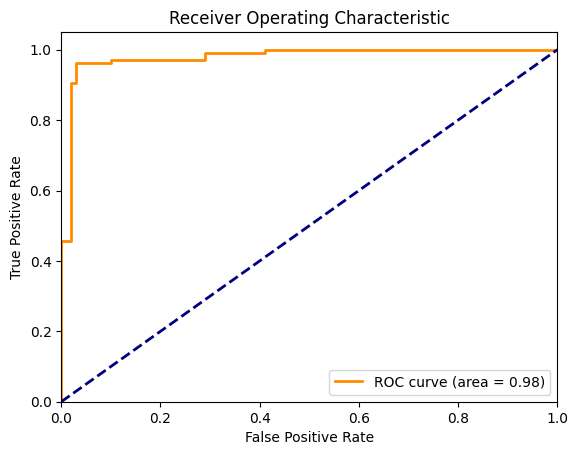

In [51]:
# Re-evaluate Random Forest
print("Random Forest Re-evaluation:")
re_evaluate_model(random_forest, X_test, y_test)

Gradient Boosting Re-evaluation:
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.91      0.83      0.87       100
   Heart Disease       0.85      0.92      0.89       105

        accuracy                           0.88       205
       macro avg       0.88      0.88      0.88       205
    weighted avg       0.88      0.88      0.88       205

Confusion Matrix:
[[83 17]
 [ 8 97]]


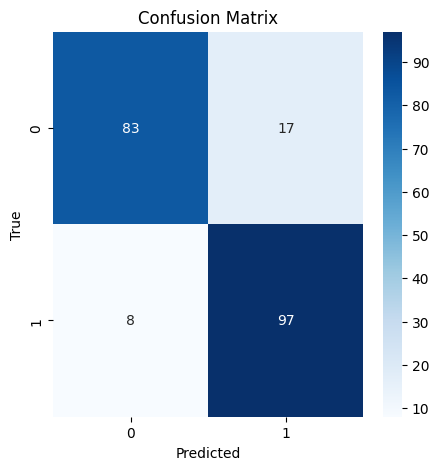

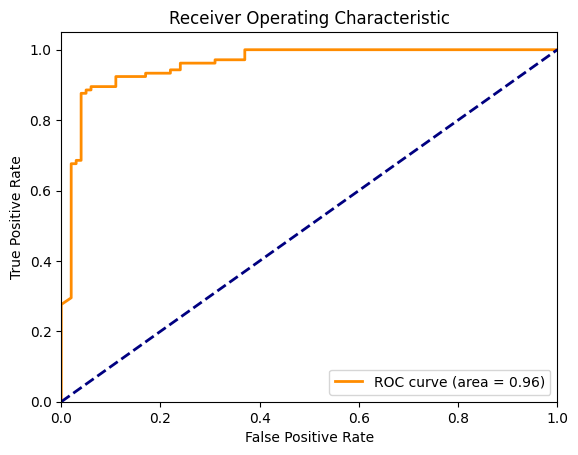

In [52]:
# Re-evaluate Gradient Boosting
print("Gradient Boosting Re-evaluation:")
re_evaluate_model(gradient_boosting, X_test, y_test)